# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import sys
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

('State shape: ', (8,))
('Number of actions: ', 4)


Before running the next code cell, familiarize yourself with the code in **Step 2** and **Step 3** of this notebook, along with the code in `dqn_agent.py` and `model.py`.  Once you have an understanding of how the different files work together, 
- Define a neural network architecture in `model.py` that maps states to action values.  This file is mostly empty - it's up to you to define your own deep Q-network!
- Finish the `learn` method in the `Agent` class in `dqn_agent.py`.  The sampled batch of experience tuples is already provided for you; you need only use the local and target Q-networks to compute the loss, before taking a step towards minimizing the loss.

Once you have completed the code in `dqn_agent.py` and `model.py`, run the code cell below.  (_If you end up needing to make multiple changes and get unexpected behavior, please restart the kernel and run the cells from the beginning of the notebook!_)

You can find the solution files, along with saved model weights for a trained agent, in the `solution/` folder.  (_Note that there are many ways to solve this exercise, and the "solution" is just one way of approaching the problem, to yield a trained agent._)

In [3]:
from dqn_agent import Agent

agent = Agent(state_size=8, action_size=4, seed=0)

# watch an untrained agent
state = env.reset()
for j in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Episode 1	Average Score: -326.32
Episode 2	Average Score: -200.57
Episode 3	Average Score: -271.27
Episode 4	Average Score: -228.00
Episode 5	Average Score: -206.64
Episode 6	Average Score: -186.28
Episode 7	Average Score: -159.60
Episode 8	Average Score: -148.70
Episode 9	Average Score: -151.31
Episode 10	Average Score: -159.49
Episode 11	Average Score: -148.78
Episode 12	Average Score: -142.72
Episode 13	Average Score: -160.83
Episode 14	Average Score: -155.23
Episode 15	Average Score: -155.73
Episode 16	Average Score: -166.04
Episode 17	Average Score: -159.73
Episode 18	Average Score: -163.49
Episode 19	Average Score: -163.30
Episode 20	Average Score: -159.11
Episode 21	Average Score: -155.99
Episode 22	Average Score: -159.96
Episode 23	Average Score: -156.01
Episode 24	Average Score: -160.30
Episode 25	Average Score: -163.56
Episode 26	Average Score: -167.78
Episode 27	Average Score: -172.40
Episode 28	Average Score: -179.43
Episode 29	Average Score: -175.21
Episode 30	Average Scor

Episode 240	Average Score: -66.47
Episode 241	Average Score: -63.97
Episode 242	Average Score: -63.77
Episode 243	Average Score: -62.89
Episode 244	Average Score: -63.36
Episode 245	Average Score: -63.84
Episode 246	Average Score: -63.55
Episode 247	Average Score: -62.41
Episode 248	Average Score: -63.81
Episode 249	Average Score: -62.91
Episode 250	Average Score: -63.12
Episode 251	Average Score: -66.03
Episode 252	Average Score: -64.65
Episode 253	Average Score: -64.09
Episode 254	Average Score: -62.55
Episode 255	Average Score: -61.44
Episode 256	Average Score: -61.45
Episode 257	Average Score: -60.34
Episode 258	Average Score: -61.03
Episode 259	Average Score: -55.62
Episode 260	Average Score: -56.06
Episode 261	Average Score: -56.98
Episode 262	Average Score: -54.31
Episode 263	Average Score: -53.94
Episode 264	Average Score: -55.33
Episode 265	Average Score: -53.82
Episode 266	Average Score: -53.81
Episode 267	Average Score: -52.55
Episode 268	Average Score: -53.56
Episode 269	Av

Episode 486	Average Score: 47.95
Episode 487	Average Score: 50.16
Episode 488	Average Score: 48.11
Episode 489	Average Score: 45.32
Episode 490	Average Score: 47.99
Episode 491	Average Score: 44.36
Episode 492	Average Score: 43.43
Episode 493	Average Score: 45.94
Episode 494	Average Score: 43.29
Episode 495	Average Score: 41.04
Episode 496	Average Score: 42.87
Episode 497	Average Score: 44.60
Episode 498	Average Score: 43.76
Episode 499	Average Score: 43.42
Episode 500	Average Score: 40.97
Episode 501	Average Score: 43.41
Episode 502	Average Score: 43.71
Episode 503	Average Score: 45.26
Episode 504	Average Score: 48.03
Episode 505	Average Score: 47.20
Episode 506	Average Score: 47.26
Episode 507	Average Score: 48.01
Episode 508	Average Score: 49.16
Episode 509	Average Score: 49.96
Episode 510	Average Score: 52.07
Episode 511	Average Score: 51.75
Episode 512	Average Score: 47.01
Episode 513	Average Score: 47.31
Episode 514	Average Score: 47.29
Episode 515	Average Score: 47.79
Episode 51

Episode 731	Average Score: 137.79
Episode 732	Average Score: 140.86
Episode 733	Average Score: 139.77
Episode 734	Average Score: 139.95
Episode 735	Average Score: 140.10
Episode 736	Average Score: 140.43
Episode 737	Average Score: 140.55
Episode 738	Average Score: 139.73
Episode 739	Average Score: 138.71
Episode 740	Average Score: 139.44
Episode 741	Average Score: 141.28
Episode 742	Average Score: 140.85
Episode 743	Average Score: 141.14
Episode 744	Average Score: 142.65
Episode 745	Average Score: 140.32
Episode 746	Average Score: 140.29
Episode 747	Average Score: 142.20
Episode 748	Average Score: 141.64
Episode 749	Average Score: 139.78
Episode 750	Average Score: 139.08
Episode 751	Average Score: 138.46
Episode 752	Average Score: 138.34
Episode 753	Average Score: 138.71
Episode 754	Average Score: 138.38
Episode 755	Average Score: 138.41
Episode 756	Average Score: 139.48
Episode 757	Average Score: 138.50
Episode 758	Average Score: 141.29
Episode 759	Average Score: 140.45
Episode 760	Av

Episode 972	Average Score: 124.58
Episode 973	Average Score: 124.71
Episode 974	Average Score: 123.28
Episode 975	Average Score: 123.29
Episode 976	Average Score: 123.12
Episode 977	Average Score: 125.71
Episode 978	Average Score: 126.90
Episode 979	Average Score: 130.27
Episode 980	Average Score: 128.87
Episode 981	Average Score: 130.71
Episode 982	Average Score: 130.62
Episode 983	Average Score: 132.05
Episode 984	Average Score: 132.33
Episode 985	Average Score: 132.40
Episode 986	Average Score: 133.45
Episode 987	Average Score: 132.76
Episode 988	Average Score: 133.19
Episode 989	Average Score: 135.03
Episode 990	Average Score: 137.90
Episode 991	Average Score: 137.59
Episode 992	Average Score: 138.70
Episode 993	Average Score: 138.19
Episode 994	Average Score: 138.91
Episode 995	Average Score: 139.74
Episode 996	Average Score: 141.61
Episode 997	Average Score: 141.42
Episode 998	Average Score: 144.08
Episode 999	Average Score: 143.83
Episode 1000	Average Score: 144.71
Episode 1001	

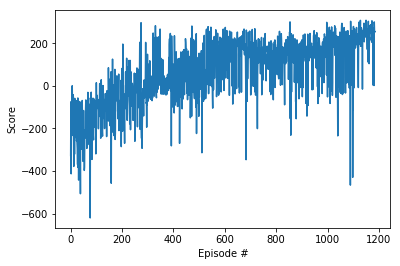

In [4]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        sys.stdout.flush()
            
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [5]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(5):
    state = env.reset()
    for j in range(200):
        action = agent.act(state)
        env.render()
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()

### 5. Explore

In this exercise, you have implemented a DQN agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task with discrete actions!
- You may like to implement some improvements such as prioritized experience replay, Double DQN, or Dueling DQN! 
- Write a blog post explaining the intuition behind the DQN algorithm and demonstrating how to use it to solve an RL environment of your choosing.  